# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Curtis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by='popularity')

In [5]:
print(f"Total articles about btc: {btc_headlines['totalResults']}")

Total articles about btc: 8850


In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by='popularity')

In [7]:
print(f"Total articles about eth: {eth_headlines['totalResults']}")

Total articles about eth: 3108


In [8]:
# Create the Bitcoin sentiment scores DataFrame


btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.000,0.779
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
2,2021-11-04,Image: Cash App\r\n\n \n\n Square has announce...,0.4767,0.075,0.000,0.925
3,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000
4,2021-10-15,Steam is banning games that are built on block...,0.2263,0.056,0.000,0.944


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_headlines["articles"])



eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.0,0.779
1,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000
2,2021-10-28,Bravely pioneering the I-used-to-do-slurs-but-...,0.5106,0.105,0.0,0.895
3,2021-11-01,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.0,1.000
4,2021-11-08,"NEW YORK, Nov 8 (Reuters) - Inflows into bitco...",0.3612,0.072,0.0,0.928


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133425,0.041800,0.009050,0.949150
std,0.343537,0.068625,0.029249,0.069055
min,-0.648600,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.911500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.385600,0.077750,0.000000,1.000000
max,0.817600,0.221000,0.118000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.055175,0.030400,0.017600,0.952000
std,0.290556,0.060597,0.040243,0.074948
min,-0.648600,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.919750
50%,0.000000,0.000000,0.000000,1.000000
75%,0.012900,0.018000,0.000000,1.000000
max,0.817600,0.221000,0.142000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (BTC) had the highest mean positive score - 0.041800

Q: Which coin had the highest compound score?

A: Ethereum (ETH) and Bitcoin (BTC) both had max compound scores of 0.817600

Q. Which coin had the highest positive score?

A: Ethereum (ETH) and Bitcoin (BTC) both had max positive scores of 0.221000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
     
    return output

In [15]:
# Create a new tokens column for Bitcoin
btc_text = btc_df['text']

btc_tokens = []

for text in btc_df['text']:
    tokens = tokenizer(text)

    btc_tokens.append(tokens)
                 
btc_df['tokens'] = btc_tokens
btc_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.000,0.779,"[crypto, reward, card, small, percentage, purc..."
1,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
2,2021-11-04,Image: Cash App\r\n\n \n\n Square has announce...,0.4767,0.075,0.000,0.925,"[image, cash, app, square, ha, announced, peop..."
3,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.000,1.000,"[new, crosschain, bridge, currently, connected..."
4,2021-10-15,Steam is banning games that are built on block...,0.2263,0.056,0.000,0.944,"[steamis, banning, game, built, blockchain, te..."


In [16]:
# Create a new tokens column for Ethereum
eth_text = eth_df['text']

eth_tokens = []

for text in eth_df['text']:
    tokens = tokenizer(text)

    eth_tokens.append(tokens)
                 
eth_df['tokens'] = eth_tokens
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-10,"With crypto rewards cards, a small percentage ...",0.8176,0.221,0.0,0.779,"[crypto, reward, card, small, percentage, purc..."
1,2021-10-16,A new cross-chain bridge is currently connecte...,0.0000,0.000,0.0,1.000,"[new, crosschain, bridge, currently, connected..."
2,2021-10-28,Bravely pioneering the I-used-to-do-slurs-but-...,0.5106,0.105,0.0,0.895,"[bravely, pioneering, iusedtodoslursbutnowisel..."
3,2021-11-01,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.0,1.000,"[representations, cryptocurrencies, bitcoin, e..."
4,2021-11-08,"NEW YORK, Nov 8 (Reuters) - Inflows into bitco...",0.3612,0.072,0.0,0.928,"[new, york, nov, reuters, inflows, bitcoin, pr..."


---

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = []
for tokens in btc_df['tokens']:
    bigrams_count = dict(Counter(ngrams(tokens, n=2)))
    btc_bigrams.append(bigrams_count.items())
btc_bigrams

[dict_items([(('crypto', 'reward'), 1), (('reward', 'card'), 1), (('card', 'small'), 1), (('small', 'percentage'), 1), (('percentage', 'purchase'), 1), (('purchase', 'redeemed'), 1), (('redeemed', 'cryptocurrency'), 1), (('cryptocurrency', 'instead'), 1), (('instead', 'cash'), 1), (('cash', 'back'), 1), (('back', 'point'), 1), (('point', 'redeemable'), 1), (('redeemable', 'reward'), 1), (('reward', 'portalthat'), 1), (('portalthat', 'mean'), 1), (('mean', 'purchas'), 1), (('purchas', 'char'), 1)]),
 dict_items([(('similar', 'hoax'), 1), (('hoax', 'earlier'), 1), (('earlier', 'year'), 1), (('year', 'tied'), 1), (('tied', 'walmart'), 1), (('walmart', 'litecoinif'), 1), (('litecoinif', 'buy'), 1), (('buy', 'something'), 1), (('something', 'verge'), 1), (('verge', 'link'), 1), (('link', 'vox'), 1), (('vox', 'media'), 1), (('media', 'may'), 1), (('may', 'earn'), 1), (('earn', 'commission'), 1), (('commission', 'see'), 1), (('see', 'ethic'), 1), (('ethic', 'statementphoto'), 1), (('statement

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = []
for tokens in btc_df['tokens']:
    bigrams_count = dict(Counter(ngrams(tokens, n=2)))
    btc_bigrams.append(bigrams_count.items())
btc_bigrams

[dict_items([(('crypto', 'reward'), 1), (('reward', 'card'), 1), (('card', 'small'), 1), (('small', 'percentage'), 1), (('percentage', 'purchase'), 1), (('purchase', 'redeemed'), 1), (('redeemed', 'cryptocurrency'), 1), (('cryptocurrency', 'instead'), 1), (('instead', 'cash'), 1), (('cash', 'back'), 1), (('back', 'point'), 1), (('point', 'redeemable'), 1), (('redeemable', 'reward'), 1), (('reward', 'portalthat'), 1), (('portalthat', 'mean'), 1), (('mean', 'purchas'), 1), (('purchas', 'char'), 1)]),
 dict_items([(('similar', 'hoax'), 1), (('hoax', 'earlier'), 1), (('earlier', 'year'), 1), (('year', 'tied'), 1), (('tied', 'walmart'), 1), (('walmart', 'litecoinif'), 1), (('litecoinif', 'buy'), 1), (('buy', 'something'), 1), (('something', 'verge'), 1), (('verge', 'link'), 1), (('link', 'vox'), 1), (('vox', 'media'), 1), (('media', 'may'), 1), (('may', 'earn'), 1), (('earn', 'commission'), 1), (('commission', 'see'), 1), (('see', 'ethic'), 1), (('ethic', 'statementphoto'), 1), (('statement

In [20]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = []
for tokens in eth_df['tokens']:
    bigrams_count = dict(Counter(ngrams(tokens, n=2)))
    eth_bigrams.append(bigrams_count.items())
eth_bigrams

[dict_items([(('crypto', 'reward'), 1), (('reward', 'card'), 1), (('card', 'small'), 1), (('small', 'percentage'), 1), (('percentage', 'purchase'), 1), (('purchase', 'redeemed'), 1), (('redeemed', 'cryptocurrency'), 1), (('cryptocurrency', 'instead'), 1), (('instead', 'cash'), 1), (('cash', 'back'), 1), (('back', 'point'), 1), (('point', 'redeemable'), 1), (('redeemable', 'reward'), 1), (('reward', 'portalthat'), 1), (('portalthat', 'mean'), 1), (('mean', 'purchas'), 1), (('purchas', 'char'), 1)]),
 dict_items([(('new', 'crosschain'), 1), (('crosschain', 'bridge'), 2), (('bridge', 'currently'), 1), (('currently', 'connected'), 1), (('connected', 'ethereum'), 1), (('ethereum', 'crosschain'), 1), (('bridge', 'cardano'), 1), (('cardano', 'public'), 1), (('public', 'chain'), 1), (('chain', 'come'), 1), (('come', 'futurenervostoday'), 1), (('futurenervostoday', 'announced'), 1), (('announced', 'force'), 1), (('force', 'bridge'), 1), (('bridge', 'char'), 1)]),
 dict_items([(('bravely', 'pion

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_dict = {}
for btc_token in btc_df['tokens']:
    top = dict(token_count(btc_token, 10))
    for key in top:
        if(key in btc_dict):
            btc_dict[key] += top[key]
        else:
            btc_dict[key] = top[key]
btc_word_list = list(btc_dict.items())
x = sorted(btc_word_list, key=lambda x:x[1], reverse=True)
btc_top_10 = []

for i in range(0,10):
    btc_top_10.append(x[i])
btc_top_10

[('bitcoin', 18),
 ('cryptocurrency', 6),
 ('new', 4),
 ('representation', 4),
 ('illustration', 4),
 ('taken', 4),
 ('posted', 4),
 ('cash', 3),
 ('app', 3),
 ('bridge', 3)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
eth_dict = {}
for eth_token in eth_df['tokens']:
    top = dict(token_count(eth_token, 10))
    for key in top:
        if(key in eth_dict):
            eth_dict[key] += top[key]
        else:
            eth_dict[key] = top[key]
eth_word_list = list(eth_dict.items())
x = sorted(eth_word_list, key=lambda x:x[1], reverse=True)
eth_top_10 = []

for i in range(0,10):
    eth_top_10.append(x[i])
eth_top_10

[('reuters', 10),
 ('bitcoin', 9),
 ('ethereum', 8),
 ('cryptocurrencies', 7),
 ('representation', 7),
 ('cryptocurrency', 5),
 ('new', 5),
 ('litecoin', 5),
 ('representations', 4),
 ('dogecoin', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

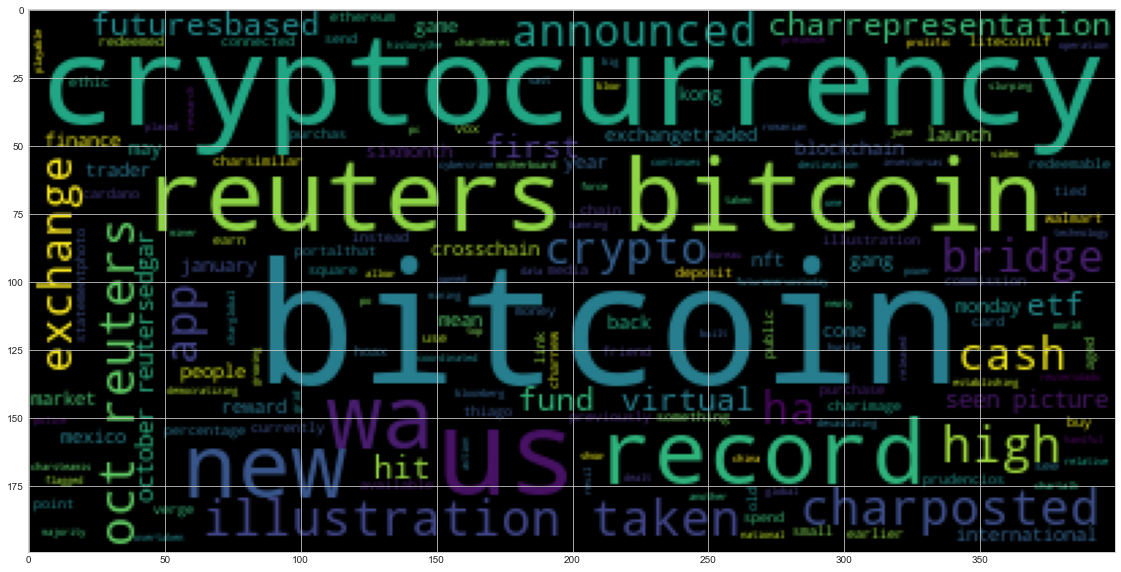

In [25]:
# Generate the Bitcoin word cloud
btc_text_list = []
for btc_tokens in btc_df['tokens']:
    btc_text_list.append(" ".join(btc_tokens))
text = ""
for i in btc_text_list:
    text += i
btc_word_cloud = WordCloud().generate(text)
plt.imshow(btc_word_cloud)

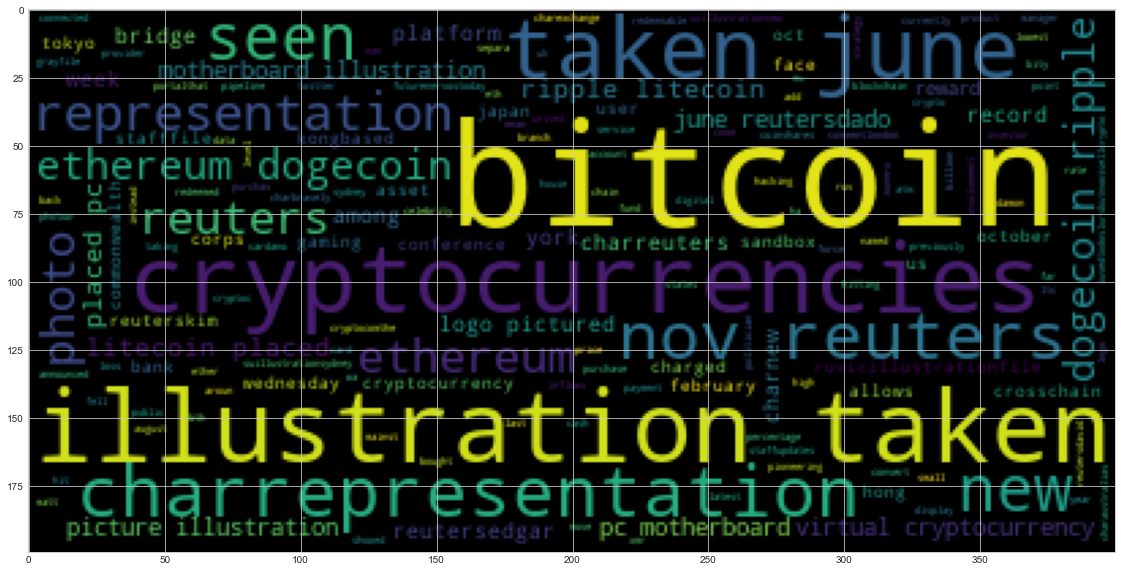

In [26]:
# Generate the Ethereum word cloud
eth_text_list = []
for eth_tokens in eth_df['tokens']:
    eth_text_list.append(" ".join(eth_tokens))
text = ""
for i in eth_text_list:
    text += i
eth_word_cloud = WordCloud().generate(text)
plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_text = ""
for text in btc_df['text']:
    btc_text += text
btc_text

'With crypto rewards cards, a small percentage of your purchases can be redeemed for cryptocurrency instead of cash back or points that are redeemable in a rewards portalthat means 1-2% of all purchas… [+3232 chars]A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Image: Cash App\r\n\n \n\n Square has announced that people over 13 years old can use Cash App to deposit and spend money or send it to friends. The app was previously only available to people aged 18 or … [+1854 chars]A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]Steam\xa0is banning games that are built on blockchain technology or that allow the exchange of cryptocurrency and NFTs, establis

In [31]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin (BTC) text analysis"

In [32]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [33]:
# List all Entities
btc_doc.ents

(1-2%,
 earlier this year,
 Verge,
 Vox Media,
 Thiago Prudencio/S,
 Square,
 13 years old,
 18,
 Ethereum,
 Cardano,
 Nervos ,
 today,
 the Force Bridge,
 NFT,
 U.S.,
 U.S.,
 China,
 Bitcoin,
 Bloomberg,
 the National Bureau,
 Monday,
 Romanian,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/IllustrationHONG KONG,
 Oct 21,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuLONDON,
 Oct 20,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuHONG KONG,
 Oct 20,
 Reuters,
 Wednesday,
 first,
 U.S.,
 Conway G. Gittens,
 October 18, 2021,
 REUTERS,
 Edgar SuSINGAPORE,
 Oct 19,
 Reuters,
 six-month,
 Reuters,
 Reuters,
 six-month,
 Tuesday,
 U.S.,
 ETF,
 Mexican,
 Volaris,
 Benito Juarez International Airport,
 Mexico City,
 Mexico,
 January 10, 2018,
 January 10, 2018,
 68,000,
 $5k,
 CoinGecko,
 more than $3 trillion,
 Jamie Dimon,
 JPMorgan Chase &amp,
 Monday,
 the Institute of International Finance,
 60,000,
 first,
 six months,
 Friday,
 U.S.,
 U.S.,
 this week)

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_text = ""
for text in eth_df['text']:
    eth_text += text
eth_text

"With crypto rewards cards, a small percentage of your purchases can be redeemed for cryptocurrency instead of cash back or points that are redeemable in a rewards portalthat means 1-2% of all purchas… [+3232 chars]A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars]Bravely pioneering the I-used-to-do-slurs-but-now-I-sell-crypto pipeline, Matt Damon has been named the new face of Crypto.comthe latest move in the platforms strategy to convert new users and mainst… [+2883 chars]Representations of cryptocurrencies Bitcoin, Ethereum, DogeCoin, Ripple, Litecoin are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/Illustration/File Photo MU… [+3384 chars]NEW YORK, Nov 8 (Reuters) - Inflows into bitcoin products and funds have hit a record $6.4 billion so far this year, data from digital ass

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum (ETH) text analysis"

In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [37]:
# List all Entities
eth_doc.ents

(1-2%,
 Ethereum,
 Cardano,
 Nervos ,
 today,
 the Force Bridge,
 Matt Damon,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/Illustration/File Photo MU,
 Nov 8,
 Reuters,
 a record $6.4 billion,
 this year,
 CoinShares,
 Ethereum,
 June 14, 2021,
 REUTERS,
 Edgar Su/IllustrationSYDNEY,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/Illustration/File Photo,
 Ethereum,
 June 14, 2021,
 REUTERS,
 Edgar Su/IllustrationNEW,
 Reuters,
 FILE,
 Ethereum,
 June 14, 2021,
 REUTERS,
 Reuters,
 FILE,
 June 29, 2021,
 REUTERS,
 Dado Ruv,
 Bitcoin (BTH,
 Monero,
 XMR,
 ATM,
 Bity,
 House,
 Reuters,
 LONDON,
 Oct 27,
 Reuters,
 Wednesday,
 1-1/2 weeks,
 last week,
 Nov 3,
 Reuters,
 U.K.,
 the United States,
 Twitter,
 Wednesday,
 Commonwealth Bank,
 Sydney,
 August 2, 2014,
 REUTERS,
 David Gray/File,
 Nov 3,
 Reuters,
 October 19, 2021,
 REUTERS,
 Edgar SuSYDNEY,
 Nov 8,
 Reuters,
 two,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/IllustrationSYDNEY,
 Oct 21,
 Tokyo,
 Japan,
 February 4, 2021,
 REUTERS,
 Kim Kyung-HoonNov,

---